In [5]:
import tensorflow as tf
import numpy as np

In [6]:
print(tf.__version__)

2.3.0-rc2


## Random Number Generation
    1. Uniform Distribution
    2. Normal Distribution
    
    - It is often used to initialize Xavier initialization or He initialization to uniform distribution and normal distribution.

### 1. Uniform Distribution

In [7]:
#tf.random.uniform([Array Form], Min/Max, Min/Max)
rand = tf.random.uniform([3], 0,1)
print(rand, end='\n\n')

rand = tf.random.uniform([2, 2], 7, 6)
print(rand)

tf.Tensor([0.04401302 0.12947428 0.24915493], shape=(3,), dtype=float32)

tf.Tensor(
[[6.7750998 6.6059923]
 [6.2201967 6.208761 ]], shape=(2, 2), dtype=float32)


### 2. Normal Distribution

In [8]:
#tf.random.normal([Array Form], Mean, stdev)
#ex)
rand = tf.random.normal([3], 0,1)
print(rand, end='\n\n')

rand = tf.random.normal([2, 2], 7, 0.01)
print(rand)

tf.Tensor([-0.11081882  0.86731887  1.6241724 ], shape=(3,), dtype=float32)

tf.Tensor(
[[7.011151  6.99034  ]
 [6.995526  7.0147233]], shape=(2, 2), dtype=float32)


# Generating Neurons

## 1. Activation Funtion(Sigmoid)
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1920px-Logistic-curve.svg.png" alt="drawing" width="300"/>
source : https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1920px-Logistic-curve.svg.png

In [9]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [10]:
for i in range(-7,7):
    output = sigmoid(i)
    print(i, ":", round(output, 5))

-7 : 0.00091
-6 : 0.00247
-5 : 0.00669
-4 : 0.01799
-3 : 0.04743
-2 : 0.1192
-1 : 0.26894
0 : 0.5
1 : 0.73106
2 : 0.8808
3 : 0.95257
4 : 0.98201
5 : 0.99331
6 : 0.99753


## 2. Learning Nuerons using gradient descent
<hr>
<h4>gradient descent</h4>
<img src="https://cdn-images-1.medium.com/max/600/1*iNPHcCxIvcm7RwkRaMTx1g.jpeg" alt="drawing" width="300"/>
<img src="https://miro.medium.com/max/741/1*UkIjo17ovvd4deEEt-KgWA.png" alt="drawing" width="300"/>
<h4>Mean Squiared Error</h4>
<img src="https://www.oreilly.com/library/view/mastering-tensorflow-1x/9781788292061/assets/7d7ddfc3-4bef-4f9b-986e-cdade675cf82.png" alt="drawing" width="300"/>
<hr>
source : https://www.oreilly.com/library/view/mastering-tensorflow-1x/9781788292061/1c0264af-ba5c-43d3-bb24-ba18d489dd39.xhtml<hr>
source : https://medium.com/@peteryun/ml-%EB%AA%A8%EB%91%90%EB%A5%BC-%EC%9C%84%ED%95%9C-tensorflow-3-gradient-descent-algorithm-%EA%B8%B0%EB%B3%B8-c0688208fc59<hr>
source : https://mc.ai/an-introduction-to-gradient-descent-2/

### 2-1. Without bias, Learning Weight

In [19]:
inputValue = 0.1
target = 1
weight = tf.random.normal([1], 0, 1)

print("Repetition \t Error \t Output")

for i in range(10000):
    output = sigmoid(inputValue*weigth)
    error_ = (target - output)**2
    weight = weight + 0.1*inputValue*error_

    if( i % 1000 == 0):
        print(i, "\t:", round(error_, 6), "\t", round(output,6))
    
print(weight)

Repetition 	 Error 	 Output
0 	: 0.055196 	 0.765062
1000 	: 0.055196 	 0.765062
2000 	: 0.055196 	 0.765062
3000 	: 0.055196 	 0.765062
4000 	: 0.055196 	 0.765062
5000 	: 0.055196 	 0.765062
6000 	: 0.055196 	 0.765062
7000 	: 0.055196 	 0.765062
8000 	: 0.055196 	 0.765062
9000 	: 0.055196 	 0.765062
tf.Tensor([4.2626424], shape=(1,), dtype=float32)


### 2-2. using bias, Learning Weight

In [20]:
inputValue = 0.1
target = 1

weigth = tf.random.normal([1], 0, 1)
bias   = tf.random.normal([1], 0, 1)

print("Repetition \t Error \t Output")

for i in range(1000):
    output = sigmoid(inputValue*weigth + bias)
    error_ = (target - output)**2
    weigth = weigth + inputValue*0.1*error_
    bias   = bias   + 1 * 0.1 * error_

    if( i % 100 == 0):
        print(i, "\t:", round(error_, 6), "\t", round(output,6))

Repetition 	 Error 	 Output
0 	: 0.290291 	 0.461213
100 	: 0.059666 	 0.755733
200 	: 0.030401 	 0.825642
300 	: 0.020011 	 0.85854
400 	: 0.014803 	 0.878334
500 	: 0.011701 	 0.891829
600 	: 0.009652 	 0.901753
700 	: 0.008203 	 0.909431
800 	: 0.007125 	 0.915593
900 	: 0.006293 	 0.920674


## 3.  Learning Weight for Solving AND Problem and OR Problem
<img src="https://t1.daumcdn.net/cfile/tistory/231E9B4455961D0616" alt="drawing" width="500"/><hr>
<img src="https://simonjisu.github.io/assets/ML/perceptron/perceptron_2.png" alt="drawing" width="800"/><hr>

source : https://simonjisu.github.io/numpyseries/2017/12/07/numpywithnn_1.html<hr>
source : https://thrillfighter.tistory.com/265<hr>

### 3-1) AND Problem

In [22]:
import numpy as np

In [23]:
#initialize (AND Problem)
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[0],[0],[0]])

weight_ = tf.random.normal([2],0,1)
bias_ = tf.random.normal([1], 0,1)

In [24]:
for i in range(3001):
    error_sum = 0
    
    for j in range(len(x)):
        output = sigmoid(np.sum(x[j]*weight_)+bias_)
        error = y[j][0] - output
        weight_ = weight_ + 0.1*x[j]*error
        bias_   = bias_+0.1*error
        
        #total error
        error_sum += error
        
    if (i % 300 == 0):
        print(i, ":", round(error_sum,6))

0 : -0.198296
300 : -0.08296
600 : -0.04688
900 : -0.032487
1200 : -0.02478
1500 : -0.019997
1800 : -0.016744
2100 : -0.014395
2400 : -0.012617
2700 : -0.011229
3000 : -0.010112


In [26]:
for i in range(len(x)):
    print('X :', x[i], 'Y : ', y[i], 'Output : ', round(sigmoid(np.sum(x[i]*weight_)+bias_),1))

X : [1 1] Y :  [1] Output :  1.0
X : [1 0] Y :  [0] Output :  0.0
X : [0 1] Y :  [0] Output :  0.0
X : [0 0] Y :  [0] Output :  0.0


### 3-2) OR Problem

In [161]:
#initialize (OR Problem)
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[1],[1],[0]])

weight_ = tf.random.normal([2],0,1)
bias_ = tf.random.normal([1], 0,1)

In [162]:
for i in range(3001):
    error_sum = 0
    
    for j in range(len(x)):
        output = sigmoid(np.sum(x[j]*weight_)+bias_)
        error = y[j][0] - output
        weight_ = weight_ + 0.1*x[j]*error
        bias_   = bias_+0.1*error
        
        #total error
        error_sum += error
        
    if (i % 300 == 0):
        print(i, ":", round(error_sum,6))

0 : 1.288315
300 : -0.03301
600 : -0.017066
900 : -0.011447
1200 : -0.008588
1500 : -0.006863
1800 : -0.005712
2100 : -0.004888
2400 : -0.004271
2700 : -0.003792
3000 : -0.003408


In [163]:
for i in range(len(x)):
    print('X :', x[i], 'Y : ', y[i], 'Output : ', round(sigmoid(np.sum(x[i]*weight_)+bias_), 1))

X : [1 1] Y :  [1] Output :  1.0
X : [1 0] Y :  [1] Output :  1.0
X : [0 1] Y :  [1] Output :  1.0
X : [0 0] Y :  [0] Output :  0.0


### 3-3) XOR Problem
#### -A single Vector can't solve this problem
<img src="https://simonjisu.github.io/assets/ML/perceptron/perceptron_3.png" alt="drawing" width="300"/><hr>
<img src="https://mblogthumb-phinf.pstatic.net/MjAxOTA4MTdfMTk5/MDAxNTY2MDAzNjg4MTE3.9y3O_1k4p8-zUeEP7sN_WYWkIB4rElVMl8isWkFZAN8g.8tblY85F4FGg3YjYZrSvKendg4882tkB4Z3vg4sPmRwg.PNG.cni1577/%EC%BA%A1%EC%B2%98.PNG?type=w800" alt="drawing" width="300"/><hr>

source : https://simonjisu.github.io/numpyseries/2017/12/07/numpywithnn_1.html<hr>
source : https://m.blog.naver.com/PostView.nhn?blogId=cni1577&logNo=221619153912&proxyReferer=https:%2F%2Fwww.google.com%2F<hr>


In [27]:
#initialize (XOR Problem)
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])

weight_ = tf.random.normal([2],0,1)
bias_ = tf.random.normal([1], 0,1)

In [28]:
for i in range(3001):
    error_sum = 0
    
    for j in range(len(x)):
        output = sigmoid(np.sum(x[j]*weight_)+bias_)
        error = y[j][0] - output
        weight_ = weight_ + 0.1*x[j]*error
        bias_   = bias_+0.1*error
        
        #total error
        error_sum += error
        
    if (i % 300 == 0):
        print(i, ":", round(error_sum,6))

0 : 0.097843
300 : 0.001477
600 : 1.2e-05
900 : 0.0
1200 : 0.0
1500 : 0.0
1800 : 0.0
2100 : 0.0
2400 : 0.0
2700 : 0.0
3000 : 0.0


In [29]:
for i in range(len(x)):
    print('X :', x[i], 'Y : ', y[i], 'Output : ', round(sigmoid(np.sum(x[i]*weight_)+bias_), 1))

X : [1 1] Y :  [0] Output :  0.5
X : [1 0] Y :  [1] Output :  0.5
X : [0 1] Y :  [1] Output :  0.5
X : [0 0] Y :  [0] Output :  0.5


### 3-4) Making model for XOR using Keras
<hr>
<h5>-We are going to use "tf.Keras.Sequential" function</h5>
<h5>-There have two vector in Keras model</h5>

In [31]:
import numpy as np

In [32]:
#initialize (XOR Problem)
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])

In [33]:
#making model

# /***It is structure that combines neurons in a row***/  # 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=3, activation = "sigmoid", input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation = "sigmoid")
])

In [34]:
#setting model

# /*** choosing optimizer & loss function  ***/
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

In [8]:
#Checking model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [37]:
#) You can can change epochs or batch_size
history = model.fit(x, y, epochs=5000, batch_size = 1, use_multiprocessing = True)

Epoch 1/5000
4/4 [==============================] - 0s 580us/step - loss: 0.2283
Epoch 2/5000
4/4 [==============================] - 0s 651us/step - loss: 0.2282
Epoch 3/5000
4/4 [==============================] - 0s 623us/step - loss: 0.2280
Epoch 4/5000
4/4 [==============================] - 0s 565us/step - loss: 0.2279
Epoch 5/5000
4/4 [==============================] - 0s 693us/step - loss: 0.2278
Epoch 6/5000
4/4 [==============================] - 0s 624us/step - loss: 0.2278
Epoch 7/5000
4/4 [==============================] - 0s 589us/step - loss: 0.2277
Epoch 8/5000
4/4 [==============================] - 0s 509us/step - loss: 0.2276
Epoch 9/5000
4/4 [==============================] - 0s 435us/step - loss: 0.2275
Epoch 10/5000
4/4 [==============================] - 0s 493us/step - loss: 0.2274
Epoch 11/5000
4/4 [==============================] - 0s 968us/step - loss: 0.2272
Epoch 12/5000
4/4 [==============================] - 0s 686us/step - loss: 0.2271
Epoch 13/5000
4/4 [======

4/4 [==============================] - 0s 436us/step - loss: 0.2170
Epoch 101/5000
4/4 [==============================] - 0s 892us/step - loss: 0.2168
Epoch 102/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2167
Epoch 103/5000
4/4 [==============================] - 0s 579us/step - loss: 0.2166
Epoch 104/5000
4/4 [==============================] - 0s 739us/step - loss: 0.2164
Epoch 105/5000
4/4 [==============================] - 0s 679us/step - loss: 0.2163
Epoch 106/5000
4/4 [==============================] - 0s 639us/step - loss: 0.2162
Epoch 107/5000
4/4 [==============================] - 0s 613us/step - loss: 0.2160
Epoch 108/5000
4/4 [==============================] - 0s 876us/step - loss: 0.2159
Epoch 109/5000
4/4 [==============================] - 0s 592us/step - loss: 0.2158
Epoch 110/5000
4/4 [==============================] - 0s 499us/step - loss: 0.2157
Epoch 111/5000
4/4 [==============================] - 0s 868us/step - loss: 0.2156
Epoch 112/5000
4/4 [=

4/4 [==============================] - 0s 969us/step - loss: 0.2045
Epoch 199/5000
4/4 [==============================] - 0s 748us/step - loss: 0.2044
Epoch 200/5000
4/4 [==============================] - 0s 866us/step - loss: 0.2042
Epoch 201/5000
4/4 [==============================] - 0s 554us/step - loss: 0.2041
Epoch 202/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2039
Epoch 203/5000
4/4 [==============================] - 0s 888us/step - loss: 0.2039
Epoch 204/5000
4/4 [==============================] - 0s 550us/step - loss: 0.2037
Epoch 205/5000
4/4 [==============================] - 0s 748us/step - loss: 0.2036
Epoch 206/5000
4/4 [==============================] - 0s 798us/step - loss: 0.2035
Epoch 207/5000
4/4 [==============================] - 0s 621us/step - loss: 0.2033
Epoch 208/5000
4/4 [==============================] - 0s 580us/step - loss: 0.2032
Epoch 209/5000
4/4 [==============================] - 0s 811us/step - loss: 0.2031
Epoch 210/5000
4/4 [=

4/4 [==============================] - 0s 748us/step - loss: 0.1921
Epoch 298/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1920
Epoch 299/5000
4/4 [==============================] - 0s 708us/step - loss: 0.1919
Epoch 300/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1918
Epoch 301/5000
4/4 [==============================] - 0s 789us/step - loss: 0.1917
Epoch 302/5000
4/4 [==============================] - 0s 751us/step - loss: 0.1915
Epoch 303/5000
4/4 [==============================] - 0s 700us/step - loss: 0.1914
Epoch 304/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1913
Epoch 305/5000
4/4 [==============================] - 0s 912us/step - loss: 0.1912
Epoch 306/5000
4/4 [==============================] - 0s 473us/step - loss: 0.1910
Epoch 307/5000
4/4 [==============================] - 0s 759us/step - loss: 0.1910
Epoch 308/5000
4/4 [==============================] - 0s 747us/step - loss: 0.1908
Epoch 309/5000
4/4 [===

Epoch 396/5000
4/4 [==============================] - 0s 704us/step - loss: 0.1810
Epoch 397/5000
4/4 [==============================] - 0s 856us/step - loss: 0.1808
Epoch 398/5000
4/4 [==============================] - 0s 607us/step - loss: 0.1808
Epoch 399/5000
4/4 [==============================] - 0s 615us/step - loss: 0.1806
Epoch 400/5000
4/4 [==============================] - 0s 805us/step - loss: 0.1806
Epoch 401/5000
4/4 [==============================] - 0s 667us/step - loss: 0.1805
Epoch 402/5000
4/4 [==============================] - 0s 557us/step - loss: 0.1803
Epoch 403/5000
4/4 [==============================] - 0s 436us/step - loss: 0.1802
Epoch 404/5000
4/4 [==============================] - 0s 983us/step - loss: 0.1801
Epoch 405/5000
4/4 [==============================] - 0s 515us/step - loss: 0.1800
Epoch 406/5000
4/4 [==============================] - 0s 533us/step - loss: 0.1799
Epoch 407/5000
4/4 [==============================] - 0s 868us/step - loss: 0.1798
Epoc

4/4 [==============================] - 0s 997us/step - loss: 0.1714
Epoch 496/5000
4/4 [==============================] - 0s 997us/step - loss: 0.1714
Epoch 497/5000
4/4 [==============================] - 0s 723us/step - loss: 0.1713
Epoch 498/5000
4/4 [==============================] - 0s 954us/step - loss: 0.1712
Epoch 499/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1711
Epoch 500/5000
4/4 [==============================] - 0s 682us/step - loss: 0.1710
Epoch 501/5000
4/4 [==============================] - 0s 919us/step - loss: 0.1709
Epoch 502/5000
4/4 [==============================] - 0s 681us/step - loss: 0.1708
Epoch 503/5000
4/4 [==============================] - 0s 997us/step - loss: 0.1707
Epoch 504/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1707
Epoch 505/5000
4/4 [==============================] - 0s 752us/step - loss: 0.1706
Epoch 506/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1705
Epoch 507/5000
4/4 [===

4/4 [==============================] - 0s 837us/step - loss: 0.1636
Epoch 595/5000
4/4 [==============================] - 0s 564us/step - loss: 0.1635
Epoch 596/5000
4/4 [==============================] - 0s 472us/step - loss: 0.1635
Epoch 597/5000
4/4 [==============================] - 0s 987us/step - loss: 0.1634
Epoch 598/5000
4/4 [==============================] - 0s 786us/step - loss: 0.1633
Epoch 599/5000
4/4 [==============================] - 0s 653us/step - loss: 0.1633
Epoch 600/5000
4/4 [==============================] - 0s 967us/step - loss: 0.1632
Epoch 601/5000
4/4 [==============================] - 0s 627us/step - loss: 0.1631
Epoch 602/5000
4/4 [==============================] - 0s 565us/step - loss: 0.1630
Epoch 603/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1630
Epoch 604/5000
4/4 [==============================] - 0s 483us/step - loss: 0.1629
Epoch 605/5000
4/4 [==============================] - 0s 450us/step - loss: 0.1629
Epoch 606/5000
4/4 [=

4/4 [==============================] - 0s 997us/step - loss: 0.1575
Epoch 693/5000
4/4 [==============================] - 0s 708us/step - loss: 0.1574
Epoch 694/5000
4/4 [==============================] - 0s 460us/step - loss: 0.1573
Epoch 695/5000
4/4 [==============================] - 0s 875us/step - loss: 0.1573
Epoch 696/5000
4/4 [==============================] - 0s 622us/step - loss: 0.1572
Epoch 697/5000
4/4 [==============================] - 0s 738us/step - loss: 0.1572
Epoch 698/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1571
Epoch 699/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1570
Epoch 700/5000
4/4 [==============================] - 0s 586us/step - loss: 0.1570
Epoch 701/5000
4/4 [==============================] - 0s 996us/step - loss: 0.1569
Epoch 702/5000
4/4 [==============================] - 0s 576us/step - loss: 0.1569
Epoch 703/5000
4/4 [==============================] - 0s 557us/step - loss: 0.1568
Epoch 704/5000
4/4 [=

4/4 [==============================] - 0s 857us/step - loss: 0.1525
Epoch 792/5000
4/4 [==============================] - 0s 505us/step - loss: 0.1525
Epoch 793/5000
4/4 [==============================] - 0s 525us/step - loss: 0.1525
Epoch 794/5000
4/4 [==============================] - 0s 509us/step - loss: 0.1524
Epoch 795/5000
4/4 [==============================] - 0s 519us/step - loss: 0.1524
Epoch 796/5000
4/4 [==============================] - 0s 542us/step - loss: 0.1523
Epoch 797/5000
4/4 [==============================] - 0s 630us/step - loss: 0.1523
Epoch 798/5000
4/4 [==============================] - 0s 789us/step - loss: 0.1523
Epoch 799/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1522
Epoch 800/5000
4/4 [==============================] - 0s 766us/step - loss: 0.1522
Epoch 801/5000
4/4 [==============================] - 0s 966us/step - loss: 0.1521
Epoch 802/5000
4/4 [==============================] - 0s 747us/step - loss: 0.1521
Epoch 803/5000
4/4 

4/4 [==============================] - 0s 570us/step - loss: 0.1488
Epoch 890/5000
4/4 [==============================] - 0s 798us/step - loss: 0.1487
Epoch 891/5000
4/4 [==============================] - 0s 872us/step - loss: 0.1487
Epoch 892/5000
4/4 [==============================] - 0s 767us/step - loss: 0.1487
Epoch 893/5000
4/4 [==============================] - 0s 512us/step - loss: 0.1486
Epoch 894/5000
4/4 [==============================] - 0s 868us/step - loss: 0.1486
Epoch 895/5000
4/4 [==============================] - 0s 624us/step - loss: 0.1486
Epoch 896/5000
4/4 [==============================] - 0s 589us/step - loss: 0.1485
Epoch 897/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1485
Epoch 898/5000
4/4 [==============================] - 0s 903us/step - loss: 0.1485
Epoch 899/5000
4/4 [==============================] - 0s 558us/step - loss: 0.1484
Epoch 900/5000
4/4 [==============================] - 0s 549us/step - loss: 0.1484
Epoch 901/5000
4/4 

4/4 [==============================] - 0s 877us/step - loss: 0.1457
Epoch 989/5000
4/4 [==============================] - 0s 544us/step - loss: 0.1457
Epoch 990/5000
4/4 [==============================] - 0s 618us/step - loss: 0.1457
Epoch 991/5000
4/4 [==============================] - 0s 713us/step - loss: 0.1457
Epoch 992/5000
4/4 [==============================] - 0s 675us/step - loss: 0.1456
Epoch 993/5000
4/4 [==============================] - 0s 646us/step - loss: 0.1456
Epoch 994/5000
4/4 [==============================] - 0s 963us/step - loss: 0.1456
Epoch 995/5000
4/4 [==============================] - 0s 589us/step - loss: 0.1456
Epoch 996/5000
4/4 [==============================] - 0s 539us/step - loss: 0.1455
Epoch 997/5000
4/4 [==============================] - 0s 609us/step - loss: 0.1455
Epoch 998/5000
4/4 [==============================] - 0s 823us/step - loss: 0.1455
Epoch 999/5000
4/4 [==============================] - 0s 748us/step - loss: 0.1455
Epoch 1000/5000
4/4

Epoch 1086/5000
4/4 [==============================] - 0s 641us/step - loss: 0.1434
Epoch 1087/5000
4/4 [==============================] - 0s 567us/step - loss: 0.1433
Epoch 1088/5000
4/4 [==============================] - 0s 608us/step - loss: 0.1433
Epoch 1089/5000
4/4 [==============================] - 0s 746us/step - loss: 0.1433
Epoch 1090/5000
4/4 [==============================] - 0s 501us/step - loss: 0.1433
Epoch 1091/5000
4/4 [==============================] - 0s 473us/step - loss: 0.1433
Epoch 1092/5000
4/4 [==============================] - 0s 748us/step - loss: 0.1432
Epoch 1093/5000
4/4 [==============================] - 0s 561us/step - loss: 0.1432
Epoch 1094/5000
4/4 [==============================] - 0s 660us/step - loss: 0.1432
Epoch 1095/5000
4/4 [==============================] - 0s 564us/step - loss: 0.1432
Epoch 1096/5000
4/4 [==============================] - 0s 680us/step - loss: 0.1432
Epoch 1097/5000
4/4 [==============================] - 0s 768us/step - loss:

4/4 [==============================] - 0s 674us/step - loss: 0.1415
Epoch 1184/5000
4/4 [==============================] - 0s 785us/step - loss: 0.1414
Epoch 1185/5000
4/4 [==============================] - 0s 580us/step - loss: 0.1414
Epoch 1186/5000
4/4 [==============================] - 0s 640us/step - loss: 0.1414
Epoch 1187/5000
4/4 [==============================] - 0s 607us/step - loss: 0.1414
Epoch 1188/5000
4/4 [==============================] - 0s 800us/step - loss: 0.1414
Epoch 1189/5000
4/4 [==============================] - 0s 688us/step - loss: 0.1414
Epoch 1190/5000
4/4 [==============================] - 0s 701us/step - loss: 0.1413
Epoch 1191/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1413
Epoch 1192/5000
4/4 [==============================] - 0s 660us/step - loss: 0.1413
Epoch 1193/5000
4/4 [==============================] - 0s 756us/step - loss: 0.1413
Epoch 1194/5000
4/4 [==============================] - 0s 759us/step - loss: 0.1413
Epoch 1195

Epoch 1281/5000
4/4 [==============================] - 0s 634us/step - loss: 0.1399
Epoch 1282/5000
4/4 [==============================] - 0s 655us/step - loss: 0.1399
Epoch 1283/5000
4/4 [==============================] - 0s 530us/step - loss: 0.1399
Epoch 1284/5000
4/4 [==============================] - 0s 461us/step - loss: 0.1398
Epoch 1285/5000
4/4 [==============================] - 0s 614us/step - loss: 0.1398
Epoch 1286/5000
4/4 [==============================] - 0s 697us/step - loss: 0.1398
Epoch 1287/5000
4/4 [==============================] - 0s 654us/step - loss: 0.1398
Epoch 1288/5000
4/4 [==============================] - 0s 570us/step - loss: 0.1398
Epoch 1289/5000
4/4 [==============================] - 0s 697us/step - loss: 0.1398
Epoch 1290/5000
4/4 [==============================] - 0s 540us/step - loss: 0.1398
Epoch 1291/5000
4/4 [==============================] - 0s 596us/step - loss: 0.1397
Epoch 1292/5000
4/4 [==============================] - 0s 614us/step - loss:

4/4 [==============================] - 0s 851us/step - loss: 0.1386
Epoch 1379/5000
4/4 [==============================] - 0s 748us/step - loss: 0.1386
Epoch 1380/5000
4/4 [==============================] - 0s 626us/step - loss: 0.1386
Epoch 1381/5000
4/4 [==============================] - 0s 644us/step - loss: 0.1386
Epoch 1382/5000
4/4 [==============================] - 0s 427us/step - loss: 0.1385
Epoch 1383/5000
4/4 [==============================] - 0s 474us/step - loss: 0.1385
Epoch 1384/5000
4/4 [==============================] - 0s 766us/step - loss: 0.1385
Epoch 1385/5000
4/4 [==============================] - 0s 718us/step - loss: 0.1385
Epoch 1386/5000
4/4 [==============================] - 0s 611us/step - loss: 0.1385
Epoch 1387/5000
4/4 [==============================] - 0s 544us/step - loss: 0.1385
Epoch 1388/5000
4/4 [==============================] - 0s 751us/step - loss: 0.1385
Epoch 1389/5000
4/4 [==============================] - 0s 930us/step - loss: 0.1385
Epoch 13

4/4 [==============================] - 0s 818us/step - loss: 0.1375
Epoch 1476/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1375
Epoch 1477/5000
4/4 [==============================] - 0s 912us/step - loss: 0.1375
Epoch 1478/5000
4/4 [==============================] - 0s 879us/step - loss: 0.1375
Epoch 1479/5000
4/4 [==============================] - 0s 761us/step - loss: 0.1375
Epoch 1480/5000
4/4 [==============================] - 0s 521us/step - loss: 0.1375
Epoch 1481/5000
4/4 [==============================] - 0s 733us/step - loss: 0.1375
Epoch 1482/5000
4/4 [==============================] - 0s 622us/step - loss: 0.1374
Epoch 1483/5000
4/4 [==============================] - 0s 614us/step - loss: 0.1374
Epoch 1484/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1374
Epoch 1485/5000
4/4 [==============================] - 0s 543us/step - loss: 0.1374
Epoch 1486/5000
4/4 [==============================] - 0s 528us/step - loss: 0.1374
Epoch 1487/5

4/4 [==============================] - 0s 979us/step - loss: 0.1366
Epoch 1573/5000
4/4 [==============================] - 0s 658us/step - loss: 0.1366
Epoch 1574/5000
4/4 [==============================] - 0s 843us/step - loss: 0.1366
Epoch 1575/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1366
Epoch 1576/5000
4/4 [==============================] - 0s 672us/step - loss: 0.1366
Epoch 1577/5000
4/4 [==============================] - 0s 878us/step - loss: 0.1365
Epoch 1578/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1365
Epoch 1579/5000
4/4 [==============================] - 0s 597us/step - loss: 0.1365
Epoch 1580/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1365
Epoch 1581/5000
4/4 [==============================] - 0s 759us/step - loss: 0.1365
Epoch 1582/5000
4/4 [==============================] - 0s 565us/step - loss: 0.1365
Epoch 1583/5000
4/4 [==============================] - 0s 707us/step - loss: 0.1365
Epoch 1584/500

4/4 [==============================] - 0s 514us/step - loss: 0.1358
Epoch 1670/5000
4/4 [==============================] - 0s 544us/step - loss: 0.1358
Epoch 1671/5000
4/4 [==============================] - 0s 736us/step - loss: 0.1358
Epoch 1672/5000
4/4 [==============================] - 0s 704us/step - loss: 0.1358
Epoch 1673/5000
4/4 [==============================] - 0s 677us/step - loss: 0.1358
Epoch 1674/5000
4/4 [==============================] - 0s 472us/step - loss: 0.1358
Epoch 1675/5000
4/4 [==============================] - 0s 759us/step - loss: 0.1358
Epoch 1676/5000
4/4 [==============================] - 0s 656us/step - loss: 0.1358
Epoch 1677/5000
4/4 [==============================] - 0s 372us/step - loss: 0.1357
Epoch 1678/5000
4/4 [==============================] - 0s 662us/step - loss: 0.1357
Epoch 1679/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1357
Epoch 1680/5000
4/4 [==============================] - 0s 553us/step - loss: 0.1357
Epoch 1681

4/4 [==============================] - 0s 551us/step - loss: 0.1351
Epoch 1767/5000
4/4 [==============================] - 0s 952us/step - loss: 0.1351
Epoch 1768/5000
4/4 [==============================] - 0s 545us/step - loss: 0.1351
Epoch 1769/5000
4/4 [==============================] - 0s 516us/step - loss: 0.1351
Epoch 1770/5000
4/4 [==============================] - 0s 636us/step - loss: 0.1351
Epoch 1771/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1351
Epoch 1772/5000
4/4 [==============================] - 0s 748us/step - loss: 0.1351
Epoch 1773/5000
4/4 [==============================] - 0s 761us/step - loss: 0.1351
Epoch 1774/5000
4/4 [==============================] - 0s 765us/step - loss: 0.1351
Epoch 1775/5000
4/4 [==============================] - 0s 654us/step - loss: 0.1351
Epoch 1776/5000
4/4 [==============================] - 0s 662us/step - loss: 0.1351
Epoch 1777/5000
4/4 [==============================] - 0s 951us/step - loss: 0.1350
Epoch 1778

4/4 [==============================] - 0s 659us/step - loss: 0.1345
Epoch 1864/5000
4/4 [==============================] - 0s 396us/step - loss: 0.1345
Epoch 1865/5000
4/4 [==============================] - 0s 646us/step - loss: 0.1345
Epoch 1866/5000
4/4 [==============================] - 0s 518us/step - loss: 0.1345
Epoch 1867/5000
4/4 [==============================] - 0s 411us/step - loss: 0.1345
Epoch 1868/5000
4/4 [==============================] - 0s 488us/step - loss: 0.1345
Epoch 1869/5000
4/4 [==============================] - 0s 654us/step - loss: 0.1345
Epoch 1870/5000
4/4 [==============================] - 0s 491us/step - loss: 0.1345
Epoch 1871/5000
4/4 [==============================] - 0s 585us/step - loss: 0.1345
Epoch 1872/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1345
Epoch 1873/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1345
Epoch 1874/5000
4/4 [==============================] - 0s 513us/step - loss: 0.1345
Epoch 1875/5

4/4 [==============================] - 0s 850us/step - loss: 0.1340
Epoch 1961/5000
4/4 [==============================] - 0s 940us/step - loss: 0.1340
Epoch 1962/5000
4/4 [==============================] - 0s 688us/step - loss: 0.1340
Epoch 1963/5000
4/4 [==============================] - 0s 475us/step - loss: 0.1340
Epoch 1964/5000
4/4 [==============================] - 0s 979us/step - loss: 0.1340
Epoch 1965/5000
4/4 [==============================] - 0s 514us/step - loss: 0.1340
Epoch 1966/5000
4/4 [==============================] - 0s 767us/step - loss: 0.1340
Epoch 1967/5000
4/4 [==============================] - 0s 696us/step - loss: 0.1340
Epoch 1968/5000
4/4 [==============================] - 0s 445us/step - loss: 0.1340
Epoch 1969/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1340
Epoch 1970/5000
4/4 [==============================] - 0s 835us/step - loss: 0.1339
Epoch 1971/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1339
Epoch 1972

4/4 [==============================] - 0s 560us/step - loss: 0.1335
Epoch 2058/5000
4/4 [==============================] - 0s 665us/step - loss: 0.1335
Epoch 2059/5000
4/4 [==============================] - 0s 769us/step - loss: 0.1335
Epoch 2060/5000
4/4 [==============================] - 0s 580us/step - loss: 0.1335
Epoch 2061/5000
4/4 [==============================] - 0s 557us/step - loss: 0.1335
Epoch 2062/5000
4/4 [==============================] - 0s 998us/step - loss: 0.1335
Epoch 2063/5000
4/4 [==============================] - 0s 748us/step - loss: 0.1335
Epoch 2064/5000
4/4 [==============================] - 0s 820us/step - loss: 0.1335
Epoch 2065/5000
4/4 [==============================] - 0s 759us/step - loss: 0.1335
Epoch 2066/5000
4/4 [==============================] - 0s 541us/step - loss: 0.1335
Epoch 2067/5000
4/4 [==============================] - 0s 466us/step - loss: 0.1335
Epoch 2068/5000
4/4 [==============================] - 0s 742us/step - loss: 0.1335
Epoch 20

4/4 [==============================] - 0s 573us/step - loss: 0.1331
Epoch 2156/5000
4/4 [==============================] - 0s 827us/step - loss: 0.1331
Epoch 2157/5000
4/4 [==============================] - 0s 813us/step - loss: 0.1331
Epoch 2158/5000
4/4 [==============================] - 0s 748us/step - loss: 0.1331
Epoch 2159/5000
4/4 [==============================] - 0s 864us/step - loss: 0.1331
Epoch 2160/5000
4/4 [==============================] - 0s 715us/step - loss: 0.1331
Epoch 2161/5000
4/4 [==============================] - 0s 496us/step - loss: 0.1331
Epoch 2162/5000
4/4 [==============================] - 0s 831us/step - loss: 0.1331
Epoch 2163/5000
4/4 [==============================] - 0s 651us/step - loss: 0.1331
Epoch 2164/5000
4/4 [==============================] - 0s 568us/step - loss: 0.1331
Epoch 2165/5000
4/4 [==============================] - 0s 697us/step - loss: 0.1331
Epoch 2166/5000
4/4 [==============================] - 0s 815us/step - loss: 0.1331
Epoch 21

4/4 [==============================] - 0s 628us/step - loss: 0.1327
Epoch 2253/5000
4/4 [==============================] - 0s 584us/step - loss: 0.1327
Epoch 2254/5000
4/4 [==============================] - 0s 670us/step - loss: 0.1327
Epoch 2255/5000
4/4 [==============================] - 0s 718us/step - loss: 0.1327
Epoch 2256/5000
4/4 [==============================] - 0s 661us/step - loss: 0.1327
Epoch 2257/5000
4/4 [==============================] - 0s 618us/step - loss: 0.1327
Epoch 2258/5000
4/4 [==============================] - 0s 720us/step - loss: 0.1327
Epoch 2259/5000
4/4 [==============================] - 0s 765us/step - loss: 0.1327
Epoch 2260/5000
4/4 [==============================] - 0s 510us/step - loss: 0.1327
Epoch 2261/5000
4/4 [==============================] - 0s 562us/step - loss: 0.1327
Epoch 2262/5000
4/4 [==============================] - 0s 708us/step - loss: 0.1327
Epoch 2263/5000
4/4 [==============================] - 0s 685us/step - loss: 0.1327
Epoch 22

4/4 [==============================] - 0s 682us/step - loss: 0.1324
Epoch 2350/5000
4/4 [==============================] - 0s 748us/step - loss: 0.1324
Epoch 2351/5000
4/4 [==============================] - 0s 598us/step - loss: 0.1324
Epoch 2352/5000
4/4 [==============================] - 0s 580us/step - loss: 0.1324
Epoch 2353/5000
4/4 [==============================] - 0s 633us/step - loss: 0.1324
Epoch 2354/5000
4/4 [==============================] - 0s 749us/step - loss: 0.1324
Epoch 2355/5000
4/4 [==============================] - 0s 628us/step - loss: 0.1324
Epoch 2356/5000
4/4 [==============================] - 0s 649us/step - loss: 0.1324
Epoch 2357/5000
4/4 [==============================] - 0s 545us/step - loss: 0.1324
Epoch 2358/5000
4/4 [==============================] - 0s 583us/step - loss: 0.1324
Epoch 2359/5000
4/4 [==============================] - 0s 645us/step - loss: 0.1324
Epoch 2360/5000
4/4 [==============================] - 0s 705us/step - loss: 0.1324
Epoch 23

4/4 [==============================] - 0s 851us/step - loss: 0.1321
Epoch 2447/5000
4/4 [==============================] - 0s 758us/step - loss: 0.1321
Epoch 2448/5000
4/4 [==============================] - 0s 563us/step - loss: 0.1321
Epoch 2449/5000
4/4 [==============================] - 0s 527us/step - loss: 0.1321
Epoch 2450/5000
4/4 [==============================] - 0s 765us/step - loss: 0.1321
Epoch 2451/5000
4/4 [==============================] - 0s 585us/step - loss: 0.1321
Epoch 2452/5000
4/4 [==============================] - 0s 595us/step - loss: 0.1321
Epoch 2453/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1321
Epoch 2454/5000
4/4 [==============================] - 0s 657us/step - loss: 0.1321
Epoch 2455/5000
4/4 [==============================] - 0s 358us/step - loss: 0.1321
Epoch 2456/5000
4/4 [==============================] - 0s 536us/step - loss: 0.1321
Epoch 2457/5000
4/4 [==============================] - 0s 558us/step - loss: 0.1321
Epoch 24

4/4 [==============================] - 0s 595us/step - loss: 0.1318
Epoch 2544/5000
4/4 [==============================] - 0s 695us/step - loss: 0.1318
Epoch 2545/5000
4/4 [==============================] - 0s 612us/step - loss: 0.1318
Epoch 2546/5000
4/4 [==============================] - 0s 542us/step - loss: 0.1318
Epoch 2547/5000
4/4 [==============================] - 0s 588us/step - loss: 0.1318
Epoch 2548/5000
4/4 [==============================] - 0s 682us/step - loss: 0.1318
Epoch 2549/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1318
Epoch 2550/5000
4/4 [==============================] - 0s 518us/step - loss: 0.1318
Epoch 2551/5000
4/4 [==============================] - 0s 496us/step - loss: 0.1318
Epoch 2552/5000
4/4 [==============================] - 0s 748us/step - loss: 0.1318
Epoch 2553/5000
4/4 [==============================] - 0s 470us/step - loss: 0.1318
Epoch 2554/5000
4/4 [==============================] - 0s 587us/step - loss: 0.1318
Epoch 25

4/4 [==============================] - 0s 781us/step - loss: 0.1316
Epoch 2641/5000
4/4 [==============================] - 0s 765us/step - loss: 0.1316
Epoch 2642/5000
4/4 [==============================] - 0s 621us/step - loss: 0.1316
Epoch 2643/5000
4/4 [==============================] - 0s 399us/step - loss: 0.1316
Epoch 2644/5000
4/4 [==============================] - 0s 565us/step - loss: 0.1316
Epoch 2645/5000
4/4 [==============================] - 0s 738us/step - loss: 0.1316
Epoch 2646/5000
4/4 [==============================] - 0s 645us/step - loss: 0.1316
Epoch 2647/5000
4/4 [==============================] - 0s 682us/step - loss: 0.1316
Epoch 2648/5000
4/4 [==============================] - 0s 447us/step - loss: 0.1316
Epoch 2649/5000
4/4 [==============================] - 0s 558us/step - loss: 0.1316
Epoch 2650/5000
4/4 [==============================] - 0s 615us/step - loss: 0.1316
Epoch 2651/5000
4/4 [==============================] - 0s 745us/step - loss: 0.1316
Epoch 26

4/4 [==============================] - 0s 646us/step - loss: 0.1314
Epoch 2738/5000
4/4 [==============================] - 0s 502us/step - loss: 0.1314
Epoch 2739/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1314
Epoch 2740/5000
4/4 [==============================] - 0s 704us/step - loss: 0.1314
Epoch 2741/5000
4/4 [==============================] - 0s 531us/step - loss: 0.1314
Epoch 2742/5000
4/4 [==============================] - 0s 514us/step - loss: 0.1314
Epoch 2743/5000
4/4 [==============================] - 0s 638us/step - loss: 0.1314
Epoch 2744/5000
4/4 [==============================] - 0s 586us/step - loss: 0.1314
Epoch 2745/5000
4/4 [==============================] - 0s 610us/step - loss: 0.1314
Epoch 2746/5000
4/4 [==============================] - 0s 500us/step - loss: 0.1313
Epoch 2747/5000
4/4 [==============================] - 0s 631us/step - loss: 0.1313
Epoch 2748/5000
4/4 [==============================] - 0s 604us/step - loss: 0.1313
Epoch 2749

4/4 [==============================] - 0s 648us/step - loss: 0.1312
Epoch 2835/5000
4/4 [==============================] - 0s 690us/step - loss: 0.1312
Epoch 2836/5000
4/4 [==============================] - 0s 514us/step - loss: 0.1312
Epoch 2837/5000
4/4 [==============================] - 0s 537us/step - loss: 0.1312
Epoch 2838/5000
4/4 [==============================] - 0s 910us/step - loss: 0.1312
Epoch 2839/5000
4/4 [==============================] - 0s 577us/step - loss: 0.1311
Epoch 2840/5000
4/4 [==============================] - 0s 593us/step - loss: 0.1311
Epoch 2841/5000
4/4 [==============================] - 0s 710us/step - loss: 0.1311
Epoch 2842/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1311
Epoch 2843/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1311
Epoch 2844/5000
4/4 [==============================] - 0s 671us/step - loss: 0.1311
Epoch 2845/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1311
Epoch 28

4/4 [==============================] - 0s 843us/step - loss: 0.1310
Epoch 2932/5000
4/4 [==============================] - 0s 808us/step - loss: 0.1310
Epoch 2933/5000
4/4 [==============================] - 0s 541us/step - loss: 0.1310
Epoch 2934/5000
4/4 [==============================] - 0s 633us/step - loss: 0.1310
Epoch 2935/5000
4/4 [==============================] - 0s 782us/step - loss: 0.1310
Epoch 2936/5000
4/4 [==============================] - 0s 568us/step - loss: 0.1310
Epoch 2937/5000
4/4 [==============================] - 0s 605us/step - loss: 0.1310
Epoch 2938/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1310
Epoch 2939/5000
4/4 [==============================] - 0s 481us/step - loss: 0.1310
Epoch 2940/5000
4/4 [==============================] - 0s 748us/step - loss: 0.1310
Epoch 2941/5000
4/4 [==============================] - 0s 608us/step - loss: 0.1309
Epoch 2942/5000
4/4 [==============================] - 0s 470us/step - loss: 0.1309
Epoch 2943

4/4 [==============================] - 0s 1ms/step - loss: 0.1308
Epoch 3029/5000
4/4 [==============================] - 0s 674us/step - loss: 0.1308
Epoch 3030/5000
4/4 [==============================] - 0s 768us/step - loss: 0.1308
Epoch 3031/5000
4/4 [==============================] - 0s 997us/step - loss: 0.1308
Epoch 3032/5000
4/4 [==============================] - 0s 701us/step - loss: 0.1308
Epoch 3033/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1308
Epoch 3034/5000
4/4 [==============================] - 0s 603us/step - loss: 0.1308
Epoch 3035/5000
4/4 [==============================] - 0s 780us/step - loss: 0.1308
Epoch 3036/5000
4/4 [==============================] - 0s 799us/step - loss: 0.1308
Epoch 3037/5000
4/4 [==============================] - 0s 626us/step - loss: 0.1308
Epoch 3038/5000
4/4 [==============================] - 0s 748us/step - loss: 0.1308
Epoch 3039/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1308
Epoch 3040/500

4/4 [==============================] - 0s 715us/step - loss: 0.1306
Epoch 3127/5000
4/4 [==============================] - 0s 799us/step - loss: 0.1306
Epoch 3128/5000
4/4 [==============================] - 0s 728us/step - loss: 0.1306
Epoch 3129/5000
4/4 [==============================] - 0s 601us/step - loss: 0.1306
Epoch 3130/5000
4/4 [==============================] - 0s 575us/step - loss: 0.1306
Epoch 3131/5000
4/4 [==============================] - 0s 639us/step - loss: 0.1306
Epoch 3132/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1306
Epoch 3133/5000
4/4 [==============================] - 0s 581us/step - loss: 0.1306
Epoch 3134/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1306
Epoch 3135/5000
4/4 [==============================] - 0s 615us/step - loss: 0.1306
Epoch 3136/5000
4/4 [==============================] - 0s 530us/step - loss: 0.1306
Epoch 3137/5000
4/4 [==============================] - 0s 748us/step - loss: 0.1306
Epoch 3138/5

Epoch 3224/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1305
Epoch 3225/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1305
Epoch 3226/5000
4/4 [==============================] - 0s 688us/step - loss: 0.1305
Epoch 3227/5000
4/4 [==============================] - 0s 745us/step - loss: 0.1305
Epoch 3228/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1305
Epoch 3229/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1305
Epoch 3230/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1305
Epoch 3231/5000
4/4 [==============================] - 0s 639us/step - loss: 0.1305
Epoch 3232/5000
4/4 [==============================] - 0s 809us/step - loss: 0.1305
Epoch 3233/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1305
Epoch 3234/5000
4/4 [==============================] - 0s 541us/step - loss: 0.1305
Epoch 3235/5000
4/4 [==============================] - 0s 605us/step - loss: 0.1305
Ep

Epoch 3322/5000
4/4 [==============================] - 0s 567us/step - loss: 0.1303
Epoch 3323/5000
4/4 [==============================] - 0s 566us/step - loss: 0.1303
Epoch 3324/5000
4/4 [==============================] - 0s 890us/step - loss: 0.1303
Epoch 3325/5000
4/4 [==============================] - 0s 589us/step - loss: 0.1303
Epoch 3326/5000
4/4 [==============================] - 0s 533us/step - loss: 0.1303
Epoch 3327/5000
4/4 [==============================] - 0s 883us/step - loss: 0.1303
Epoch 3328/5000
4/4 [==============================] - 0s 567us/step - loss: 0.1303
Epoch 3329/5000
4/4 [==============================] - 0s 626us/step - loss: 0.1303
Epoch 3330/5000
4/4 [==============================] - 0s 962us/step - loss: 0.1303
Epoch 3331/5000
4/4 [==============================] - 0s 861us/step - loss: 0.1303
Epoch 3332/5000
4/4 [==============================] - 0s 495us/step - loss: 0.1303
Epoch 3333/5000
4/4 [==============================] - 0s 638us/step - loss:

4/4 [==============================] - 0s 748us/step - loss: 0.1302
Epoch 3420/5000
4/4 [==============================] - 0s 935us/step - loss: 0.1302
Epoch 3421/5000
4/4 [==============================] - 0s 998us/step - loss: 0.1302
Epoch 3422/5000
4/4 [==============================] - 0s 828us/step - loss: 0.1302
Epoch 3423/5000
4/4 [==============================] - 0s 647us/step - loss: 0.1302
Epoch 3424/5000
4/4 [==============================] - 0s 819us/step - loss: 0.1302
Epoch 3425/5000
4/4 [==============================] - 0s 748us/step - loss: 0.1302
Epoch 3426/5000
4/4 [==============================] - 0s 651us/step - loss: 0.1302
Epoch 3427/5000
4/4 [==============================] - 0s 548us/step - loss: 0.1302
Epoch 3428/5000
4/4 [==============================] - 0s 770us/step - loss: 0.1302
Epoch 3429/5000
4/4 [==============================] - 0s 549us/step - loss: 0.1302
Epoch 3430/5000
4/4 [==============================] - 0s 477us/step - loss: 0.1302
Epoch 34

4/4 [==============================] - 0s 534us/step - loss: 0.1301
Epoch 3517/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1301
Epoch 3518/5000
4/4 [==============================] - 0s 785us/step - loss: 0.1301
Epoch 3519/5000
4/4 [==============================] - 0s 670us/step - loss: 0.1301
Epoch 3520/5000
4/4 [==============================] - 0s 741us/step - loss: 0.1301
Epoch 3521/5000
4/4 [==============================] - 0s 956us/step - loss: 0.1301
Epoch 3522/5000
4/4 [==============================] - 0s 534us/step - loss: 0.1301
Epoch 3523/5000
4/4 [==============================] - 0s 511us/step - loss: 0.1301
Epoch 3524/5000
4/4 [==============================] - 0s 992us/step - loss: 0.1301
Epoch 3525/5000
4/4 [==============================] - 0s 637us/step - loss: 0.1301
Epoch 3526/5000
4/4 [==============================] - 0s 667us/step - loss: 0.1301
Epoch 3527/5000
4/4 [==============================] - 0s 898us/step - loss: 0.1301
Epoch 35

4/4 [==============================] - 0s 736us/step - loss: 0.1300
Epoch 3614/5000
4/4 [==============================] - 0s 456us/step - loss: 0.1300
Epoch 3615/5000
4/4 [==============================] - 0s 606us/step - loss: 0.1300
Epoch 3616/5000
4/4 [==============================] - 0s 648us/step - loss: 0.1300
Epoch 3617/5000
4/4 [==============================] - 0s 755us/step - loss: 0.1300
Epoch 3618/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1300
Epoch 3619/5000
4/4 [==============================] - 0s 424us/step - loss: 0.1299
Epoch 3620/5000
4/4 [==============================] - 0s 800us/step - loss: 0.1299
Epoch 3621/5000
4/4 [==============================] - 0s 754us/step - loss: 0.1299
Epoch 3622/5000
4/4 [==============================] - 0s 536us/step - loss: 0.1299
Epoch 3623/5000
4/4 [==============================] - 0s 817us/step - loss: 0.1299
Epoch 3624/5000
4/4 [==============================] - 0s 876us/step - loss: 0.1299
Epoch 36

4/4 [==============================] - 0s 1ms/step - loss: 0.1298
Epoch 3711/5000
4/4 [==============================] - 0s 990us/step - loss: 0.1298
Epoch 3712/5000
4/4 [==============================] - 0s 793us/step - loss: 0.1298
Epoch 3713/5000
4/4 [==============================] - 0s 587us/step - loss: 0.1298
Epoch 3714/5000
4/4 [==============================] - 0s 943us/step - loss: 0.1298
Epoch 3715/5000
4/4 [==============================] - 0s 747us/step - loss: 0.1298
Epoch 3716/5000
4/4 [==============================] - 0s 609us/step - loss: 0.1298
Epoch 3717/5000
4/4 [==============================] - 0s 997us/step - loss: 0.1298
Epoch 3718/5000
4/4 [==============================] - 0s 810us/step - loss: 0.1298
Epoch 3719/5000
4/4 [==============================] - 0s 722us/step - loss: 0.1298
Epoch 3720/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1298
Epoch 3721/5000
4/4 [==============================] - 0s 720us/step - loss: 0.1298
Epoch 3722/5

Epoch 3808/5000
4/4 [==============================] - 0s 760us/step - loss: 0.1297
Epoch 3809/5000
4/4 [==============================] - 0s 720us/step - loss: 0.1297
Epoch 3810/5000
4/4 [==============================] - 0s 549us/step - loss: 0.1297
Epoch 3811/5000
4/4 [==============================] - 0s 968us/step - loss: 0.1297
Epoch 3812/5000
4/4 [==============================] - 0s 451us/step - loss: 0.1297
Epoch 3813/5000
4/4 [==============================] - 0s 467us/step - loss: 0.1297
Epoch 3814/5000
4/4 [==============================] - 0s 525us/step - loss: 0.1297
Epoch 3815/5000
4/4 [==============================] - 0s 875us/step - loss: 0.1297
Epoch 3816/5000
4/4 [==============================] - 0s 595us/step - loss: 0.1297
Epoch 3817/5000
4/4 [==============================] - 0s 640us/step - loss: 0.1297
Epoch 3818/5000
4/4 [==============================] - 0s 598us/step - loss: 0.1297
Epoch 3819/5000
4/4 [==============================] - 0s 946us/step - loss:

4/4 [==============================] - 0s 486us/step - loss: 0.1296
Epoch 3906/5000
4/4 [==============================] - 0s 766us/step - loss: 0.1296
Epoch 3907/5000
4/4 [==============================] - 0s 659us/step - loss: 0.1296
Epoch 3908/5000
4/4 [==============================] - 0s 658us/step - loss: 0.1296
Epoch 3909/5000
4/4 [==============================] - 0s 663us/step - loss: 0.1296
Epoch 3910/5000
4/4 [==============================] - 0s 586us/step - loss: 0.1296
Epoch 3911/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1296
Epoch 3912/5000
4/4 [==============================] - 0s 505us/step - loss: 0.1296
Epoch 3913/5000
4/4 [==============================] - 0s 629us/step - loss: 0.1296
Epoch 3914/5000
4/4 [==============================] - 0s 653us/step - loss: 0.1296
Epoch 3915/5000
4/4 [==============================] - 0s 548us/step - loss: 0.1296
Epoch 3916/5000
4/4 [==============================] - 0s 643us/step - loss: 0.1296
Epoch 3917

4/4 [==============================] - 0s 594us/step - loss: 0.1296
Epoch 4003/5000
4/4 [==============================] - 0s 513us/step - loss: 0.1296
Epoch 4004/5000
4/4 [==============================] - 0s 591us/step - loss: 0.1296
Epoch 4005/5000
4/4 [==============================] - 0s 633us/step - loss: 0.1296
Epoch 4006/5000
4/4 [==============================] - 0s 593us/step - loss: 0.1296
Epoch 4007/5000
4/4 [==============================] - 0s 524us/step - loss: 0.1296
Epoch 4008/5000
4/4 [==============================] - 0s 615us/step - loss: 0.1296
Epoch 4009/5000
4/4 [==============================] - 0s 582us/step - loss: 0.1296
Epoch 4010/5000
4/4 [==============================] - 0s 612us/step - loss: 0.1296
Epoch 4011/5000
4/4 [==============================] - 0s 598us/step - loss: 0.1296
Epoch 4012/5000
4/4 [==============================] - 0s 548us/step - loss: 0.1295
Epoch 4013/5000
4/4 [==============================] - 0s 616us/step - loss: 0.1295
Epoch 40

4/4 [==============================] - 0s 684us/step - loss: 0.1295
Epoch 4100/5000
4/4 [==============================] - 0s 631us/step - loss: 0.1295
Epoch 4101/5000
4/4 [==============================] - 0s 640us/step - loss: 0.1295
Epoch 4102/5000
4/4 [==============================] - 0s 755us/step - loss: 0.1295
Epoch 4103/5000
4/4 [==============================] - 0s 410us/step - loss: 0.1295
Epoch 4104/5000
4/4 [==============================] - 0s 923us/step - loss: 0.1295
Epoch 4105/5000
4/4 [==============================] - 0s 748us/step - loss: 0.1295
Epoch 4106/5000
4/4 [==============================] - 0s 713us/step - loss: 0.1295
Epoch 4107/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1295
Epoch 4108/5000
4/4 [==============================] - 0s 632us/step - loss: 0.1295
Epoch 4109/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1295
Epoch 4110/5000
4/4 [==============================] - 0s 788us/step - loss: 0.1295
Epoch 4111/5

4/4 [==============================] - 0s 1ms/step - loss: 0.1294
Epoch 4197/5000
4/4 [==============================] - 0s 487us/step - loss: 0.1294
Epoch 4198/5000
4/4 [==============================] - 0s 643us/step - loss: 0.1294
Epoch 4199/5000
4/4 [==============================] - 0s 676us/step - loss: 0.1294
Epoch 4200/5000
4/4 [==============================] - 0s 600us/step - loss: 0.1294
Epoch 4201/5000
4/4 [==============================] - 0s 773us/step - loss: 0.1294
Epoch 4202/5000
4/4 [==============================] - 0s 619us/step - loss: 0.1294
Epoch 4203/5000
4/4 [==============================] - 0s 529us/step - loss: 0.1294
Epoch 4204/5000
4/4 [==============================] - 0s 643us/step - loss: 0.1294
Epoch 4205/5000
4/4 [==============================] - 0s 555us/step - loss: 0.1294
Epoch 4206/5000
4/4 [==============================] - 0s 867us/step - loss: 0.1294
Epoch 4207/5000
4/4 [==============================] - 0s 531us/step - loss: 0.1294
Epoch 4208

4/4 [==============================] - 0s 752us/step - loss: 0.1293
Epoch 4294/5000
4/4 [==============================] - 0s 733us/step - loss: 0.1293
Epoch 4295/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1293
Epoch 4296/5000
4/4 [==============================] - 0s 614us/step - loss: 0.1293
Epoch 4297/5000
4/4 [==============================] - 0s 633us/step - loss: 0.1293
Epoch 4298/5000
4/4 [==============================] - 0s 751us/step - loss: 0.1293
Epoch 4299/5000
4/4 [==============================] - 0s 516us/step - loss: 0.1293
Epoch 4300/5000
4/4 [==============================] - 0s 750us/step - loss: 0.1293
Epoch 4301/5000
4/4 [==============================] - 0s 535us/step - loss: 0.1293
Epoch 4302/5000
4/4 [==============================] - 0s 585us/step - loss: 0.1293
Epoch 4303/5000
4/4 [==============================] - 0s 657us/step - loss: 0.1293
Epoch 4304/5000
4/4 [==============================] - 0s 838us/step - loss: 0.1293
Epoch 43

4/4 [==============================] - 0s 620us/step - loss: 0.1292
Epoch 4391/5000
4/4 [==============================] - 0s 997us/step - loss: 0.1292
Epoch 4392/5000
4/4 [==============================] - 0s 619us/step - loss: 0.1292
Epoch 4393/5000
4/4 [==============================] - 0s 631us/step - loss: 0.1292
Epoch 4394/5000
4/4 [==============================] - 0s 475us/step - loss: 0.1292
Epoch 4395/5000
4/4 [==============================] - 0s 829us/step - loss: 0.1292
Epoch 4396/5000
4/4 [==============================] - 0s 665us/step - loss: 0.1292
Epoch 4397/5000
4/4 [==============================] - 0s 519us/step - loss: 0.1292
Epoch 4398/5000
4/4 [==============================] - 0s 754us/step - loss: 0.1292
Epoch 4399/5000
4/4 [==============================] - 0s 868us/step - loss: 0.1292
Epoch 4400/5000
4/4 [==============================] - 0s 523us/step - loss: 0.1292
Epoch 4401/5000
4/4 [==============================] - 0s 577us/step - loss: 0.1292
Epoch 44

4/4 [==============================] - 0s 653us/step - loss: 0.1292
Epoch 4488/5000
4/4 [==============================] - 0s 667us/step - loss: 0.1292
Epoch 4489/5000
4/4 [==============================] - 0s 603us/step - loss: 0.1292
Epoch 4490/5000
4/4 [==============================] - 0s 640us/step - loss: 0.1292
Epoch 4491/5000
4/4 [==============================] - 0s 699us/step - loss: 0.1292
Epoch 4492/5000
4/4 [==============================] - 0s 607us/step - loss: 0.1292
Epoch 4493/5000
4/4 [==============================] - 0s 757us/step - loss: 0.1292
Epoch 4494/5000
4/4 [==============================] - 0s 560us/step - loss: 0.1292
Epoch 4495/5000
4/4 [==============================] - 0s 571us/step - loss: 0.1292
Epoch 4496/5000
4/4 [==============================] - 0s 610us/step - loss: 0.1292
Epoch 4497/5000
4/4 [==============================] - 0s 643us/step - loss: 0.1292
Epoch 4498/5000
4/4 [==============================] - 0s 532us/step - loss: 0.1292
Epoch 44

4/4 [==============================] - 0s 642us/step - loss: 0.1291
Epoch 4585/5000
4/4 [==============================] - 0s 848us/step - loss: 0.1291
Epoch 4586/5000
4/4 [==============================] - 0s 719us/step - loss: 0.1291
Epoch 4587/5000
4/4 [==============================] - 0s 699us/step - loss: 0.1291
Epoch 4588/5000
4/4 [==============================] - 0s 508us/step - loss: 0.1291
Epoch 4589/5000
4/4 [==============================] - 0s 845us/step - loss: 0.1291
Epoch 4590/5000
4/4 [==============================] - 0s 854us/step - loss: 0.1291
Epoch 4591/5000
4/4 [==============================] - 0s 600us/step - loss: 0.1291
Epoch 4592/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1291
Epoch 4593/5000
4/4 [==============================] - 0s 584us/step - loss: 0.1291
Epoch 4594/5000
4/4 [==============================] - 0s 749us/step - loss: 0.1291
Epoch 4595/5000
4/4 [==============================] - 0s 661us/step - loss: 0.1291
Epoch 45

4/4 [==============================] - 0s 704us/step - loss: 0.1290
Epoch 4682/5000
4/4 [==============================] - 0s 685us/step - loss: 0.1290
Epoch 4683/5000
4/4 [==============================] - 0s 680us/step - loss: 0.1290
Epoch 4684/5000
4/4 [==============================] - 0s 423us/step - loss: 0.1290
Epoch 4685/5000
4/4 [==============================] - 0s 646us/step - loss: 0.1290
Epoch 4686/5000
4/4 [==============================] - 0s 693us/step - loss: 0.1290
Epoch 4687/5000
4/4 [==============================] - 0s 547us/step - loss: 0.1290
Epoch 4688/5000
4/4 [==============================] - 0s 753us/step - loss: 0.1290
Epoch 4689/5000
4/4 [==============================] - 0s 755us/step - loss: 0.1290
Epoch 4690/5000
4/4 [==============================] - 0s 748us/step - loss: 0.1290
Epoch 4691/5000
4/4 [==============================] - 0s 593us/step - loss: 0.1290
Epoch 4692/5000
4/4 [==============================] - 0s 734us/step - loss: 0.1290
Epoch 46

4/4 [==============================] - 0s 645us/step - loss: 0.1290
Epoch 4779/5000
4/4 [==============================] - 0s 763us/step - loss: 0.1290
Epoch 4780/5000
4/4 [==============================] - 0s 534us/step - loss: 0.1290
Epoch 4781/5000
4/4 [==============================] - 0s 631us/step - loss: 0.1290
Epoch 4782/5000
4/4 [==============================] - 0s 455us/step - loss: 0.1290
Epoch 4783/5000
4/4 [==============================] - 0s 947us/step - loss: 0.1290
Epoch 4784/5000
4/4 [==============================] - 0s 799us/step - loss: 0.1290
Epoch 4785/5000
4/4 [==============================] - 0s 817us/step - loss: 0.1290
Epoch 4786/5000
4/4 [==============================] - 0s 652us/step - loss: 0.1290
Epoch 4787/5000
4/4 [==============================] - 0s 546us/step - loss: 0.1290
Epoch 4788/5000
4/4 [==============================] - 0s 494us/step - loss: 0.1290
Epoch 4789/5000
4/4 [==============================] - 0s 538us/step - loss: 0.1290
Epoch 47

4/4 [==============================] - 0s 758us/step - loss: 0.1289
Epoch 4876/5000
4/4 [==============================] - 0s 748us/step - loss: 0.1289
Epoch 4877/5000
4/4 [==============================] - 0s 614us/step - loss: 0.1289
Epoch 4878/5000
4/4 [==============================] - 0s 870us/step - loss: 0.1289
Epoch 4879/5000
4/4 [==============================] - 0s 877us/step - loss: 0.1289
Epoch 4880/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1289
Epoch 4881/5000
4/4 [==============================] - 0s 537us/step - loss: 0.1289
Epoch 4882/5000
4/4 [==============================] - 0s 642us/step - loss: 0.1289
Epoch 4883/5000
4/4 [==============================] - 0s 565us/step - loss: 0.1289
Epoch 4884/5000
4/4 [==============================] - 0s 557us/step - loss: 0.1289
Epoch 4885/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1289
Epoch 4886/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1289
Epoch 4887

4/4 [==============================] - 0s 780us/step - loss: 0.1289
Epoch 4973/5000
4/4 [==============================] - 0s 834us/step - loss: 0.1289
Epoch 4974/5000
4/4 [==============================] - 0s 718us/step - loss: 0.1289
Epoch 4975/5000
4/4 [==============================] - 0s 561us/step - loss: 0.1289
Epoch 4976/5000
4/4 [==============================] - 0s 509us/step - loss: 0.1289
Epoch 4977/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1289
Epoch 4978/5000
4/4 [==============================] - 0s 569us/step - loss: 0.1289
Epoch 4979/5000
4/4 [==============================] - 0s 479us/step - loss: 0.1289
Epoch 4980/5000
4/4 [==============================] - 0s 516us/step - loss: 0.1289
Epoch 4981/5000
4/4 [==============================] - 0s 499us/step - loss: 0.1289
Epoch 4982/5000
4/4 [==============================] - 0s 601us/step - loss: 0.1289
Epoch 4983/5000
4/4 [==============================] - 0s 603us/step - loss: 0.1289
Epoch 49

In [38]:
#How to Predict 
print("***Result***")
print(model.predict(x))

# Round Prediction Value
print("\n\n***Round***")
print(tf.math.round(model.predict(x)))

***Result***
[[0.50168115]
 [0.96060765]
 [0.49617776]
 [0.04461101]]


***Round***
tf.Tensor(
[[1.]
 [1.]
 [0.]
 [0.]], shape=(4, 1), dtype=float32)


In [11]:
#check the Weight & Bias
model.summary()

print("\n\n")

for weight in model.weights:
    print(weight, end = "\n\n")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________



<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.18967673, -0.826773  ],
       [ 0.696571  , -0.43893507]], dtype=float32)>

<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-0.00060787, -0.00596694], dtype=float32)>

<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[0.08124571],
       [1.3166714 ]], dtype=float32)>

<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-0.02301765], dtype=float32)>



# 4. Visualization
    -to check the learning result

In [39]:
import matplotlib.pyplot as plt

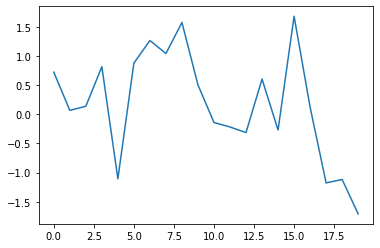

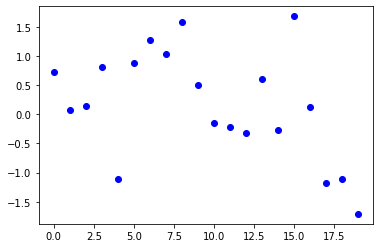

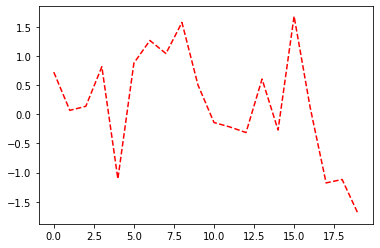

In [48]:
#ex) How to do visualization
x = range(20)
y = tf.random.normal([20], 0, 1)
plt.plot(x, y)
plt.show()

#ex) marking with the point
plt.plot(x, y, 'bo')
plt.show()

plt.plot(x, y, 'r--')
plt.show()

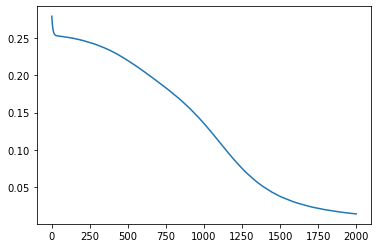

In [13]:
# plotting history that has learning error
plt.plot(history.history['loss'])
plt.show()